In [2]:
import warnings
warnings.filterwarnings

<function warnings.filterwarnings(action, message='', category=<class 'Warning'>, module='', lineno=0, append=False)>

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [4]:
data=pd.read_csv("house_data.csv")
data.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,lat,long
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,47.5112,-122.257
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,47.7210,-122.319
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,47.7379,-122.233
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,47.5208,-122.393
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,47.6168,-122.045


In [5]:
data.isnull().sum()

price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
lat              0
long             0
dtype: int64

NO null values in the given dataset

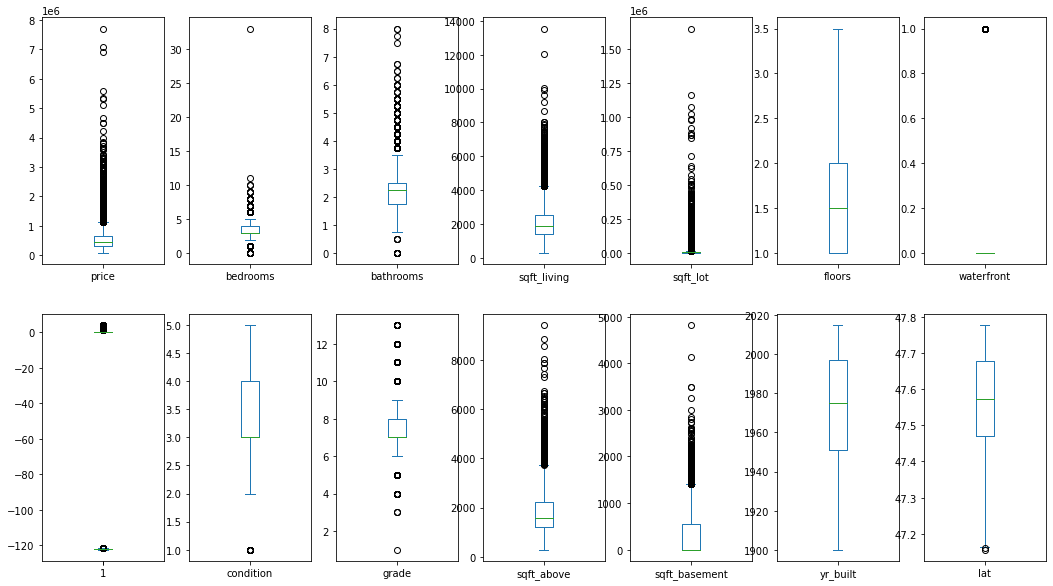

In [6]:
### Checking Outliers

size = data.shape[1]//2

fig,ax = plt.subplots(2,size,figsize=(18,10))

for c,i in enumerate(data.columns):
    try:
        if c >= size:
            data[i].plot(kind='box',ax=ax[1,c%size])
        elif c<= size:
            data[i].plot(kind='box',ax=ax[0,c])
    except Exception as e:
        pass

In [14]:
for i in['price','bedrooms','bathrooms',
         'sqft_living','sqft_lot','waterfront',
         'long','condition','grade',
         'sqft_above','sqft_basement','lat','view']:
    Q1 = np.percentile(data[i],25)
    Q3 = np.percentile(data[i],75)

    IQR = Q3 - Q1

    Upper = Q3 + 1.5*IQR
    Lower = Q1 - 1.5*IQR

    d= data[i]
    data[i][data[i]>=Upper] = Upper
    data[i][data[i]<=Lower] = Lower


C:\Users\Rohit\AppData\Local\Temp\ipykernel_62512\1564050656.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[i][data[i]>=Upper] = Upper
C:\Users\Rohit\AppData\Local\Temp\ipykernel_62512\1564050656.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[i][data[i]<=Lower] = Lower


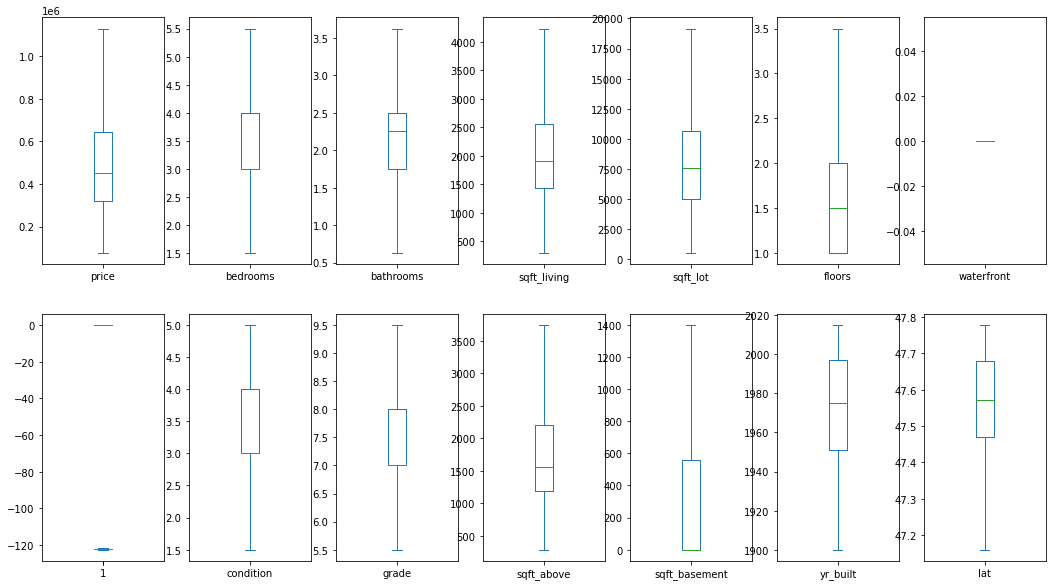

In [15]:
size = data.shape[1]//2

fig,ax = plt.subplots(2,size,figsize=(18,10))

for c,i in enumerate(data.columns):
    try:
        if c >= size:
            data[i].plot(kind='box',ax=ax[1,c%size])
        elif c<= size:
            data[i].plot(kind='box',ax=ax[0,c])
    except Exception as e:
        pass

In [16]:
data.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,lat,long
0,221900.0,3.0,1.00,1180.0,5650,1.0,0,0,3.0,7.0,1180,0,1955,47.5112,-122.257
1,538000.0,3.0,2.25,2570.0,7242,2.0,0,0,3.0,7.0,2170,400,1951,47.7210,-122.319
2,180000.0,2.0,1.00,770.0,10000,1.0,0,0,3.0,6.0,770,0,1933,47.7379,-122.233
3,604000.0,4.0,3.00,1960.0,5000,1.0,0,0,5.0,7.0,1050,910,1965,47.5208,-122.393
4,510000.0,3.0,2.00,1680.0,8080,1.0,0,0,3.0,8.0,1680,0,1987,47.6168,-122.045


In [17]:
X=data.drop(columns=['price'])
y=data['price']

In [18]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          21613 non-null  float64
 1   bedrooms       21613 non-null  float64
 2   bathrooms      21613 non-null  float64
 3   sqft_living    21613 non-null  float64
 4   sqft_lot       21613 non-null  int64  
 5   floors         21613 non-null  float64
 6   waterfront     21613 non-null  int64  
 7   view           21613 non-null  int64  
 8   condition      21613 non-null  float64
 9   grade          21613 non-null  float64
 10  sqft_above     21613 non-null  int64  
 11  sqft_basement  21613 non-null  int64  
 12  yr_built       21613 non-null  int64  
 13  lat            21613 non-null  float64
 14  long           21613 non-null  float64
dtypes: float64(9), int64(6)
memory usage: 2.5 MB


No Categorical Variable so need for dummy variable or Label Encoding


###  Scaling Data & Slicing Data


In [19]:
from sklearn.preprocessing import StandardScaler

scaler=StandardScaler()

scaled_x=scaler.fit_transform(X)


In [20]:
from sklearn.model_selection import  train_test_split

train_x,test_x,train_y,test_y=train_test_split(scaled_x,y,test_size=0.3,random_state=42)



#### MOdel Creation

In [24]:
from matplotlib import test
from sklearn.linear_model import LinearRegression
rs=LinearRegression()

rs.fit(train_x,train_y)

predict=rs.predict(test_x)
predict

array([469661.18665492, 727974.08001753, 881516.61302451, ...,
       415669.26720892, 801184.96932659, 595840.48917563])

In [26]:
rs.score(train_x,train_y),rs.score(test_x,test_y)

(0.7262653544071198, 0.7230574629412925)